# Importing libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

# Load the dataset into a pandas DataFrame

In [2]:
data = pd.read_csv('employee_data.csv') 

# Data Exploration and Visualization

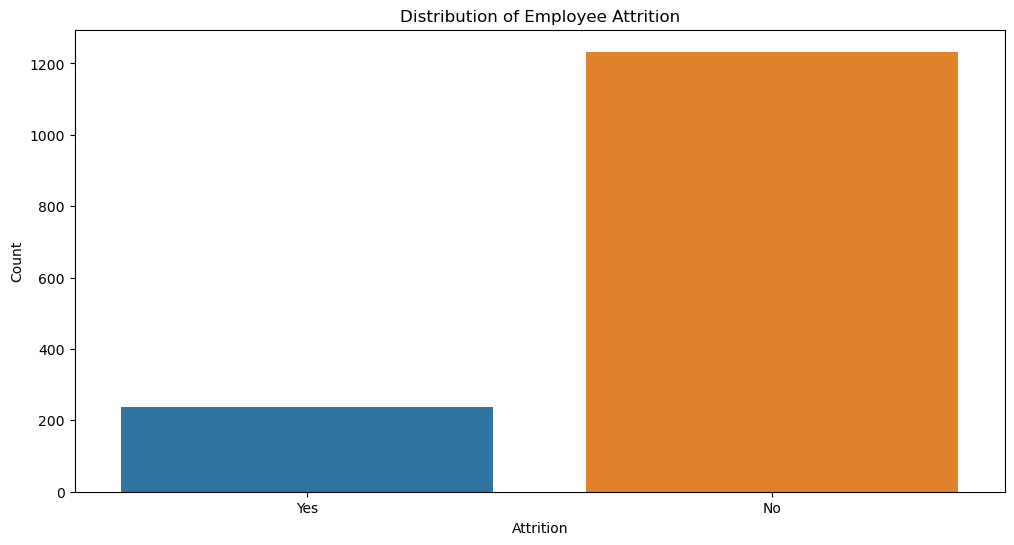

In [3]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Distribution of Employee Attrition')
plt.show()

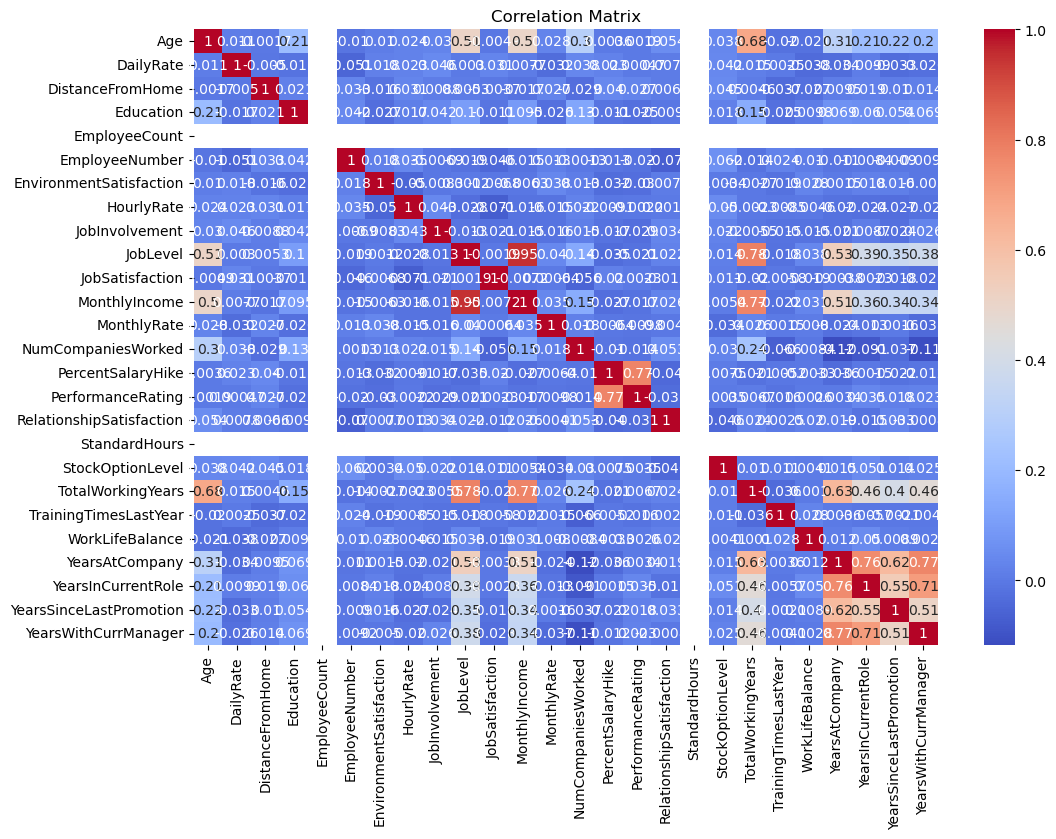

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

In [5]:
data = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
data = pd.get_dummies(data, drop_first=True)

# Split the data into features and target variable

In [6]:
X = data.drop(['Attrition_Yes'], axis=1)
y = data['Attrition_Yes'] 

#   Split the data into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [8]:
model = RandomForestClassifier()
model.fit(X_train, y_train) 

RandomForestClassifier()

# Feature Importance Plot

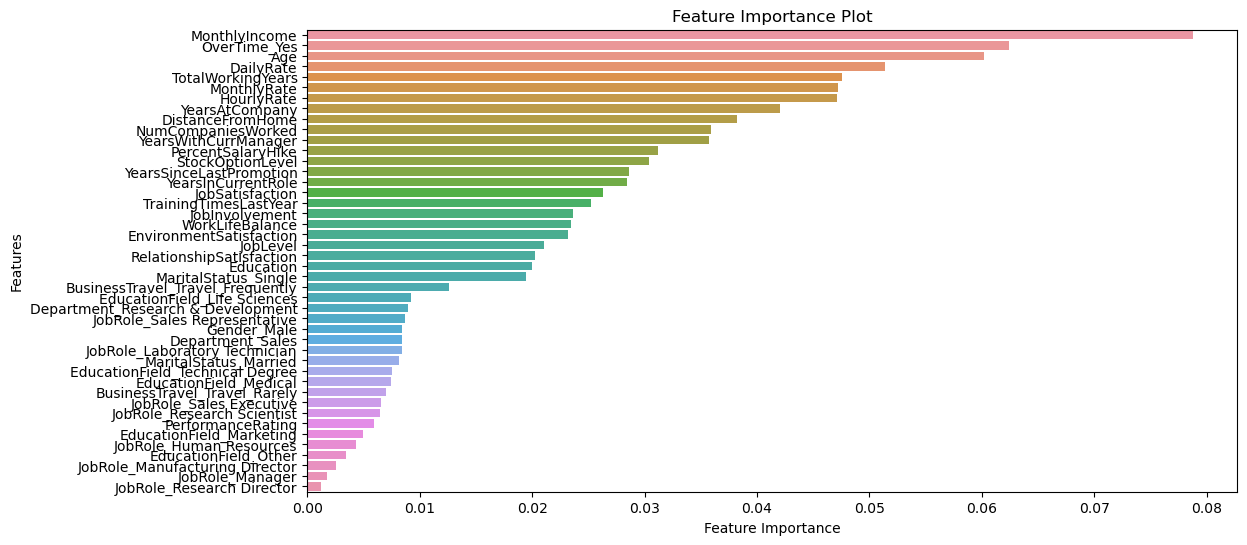

In [9]:
plt.figure(figsize=(12, 6))
importance = model.feature_importances_
features = X.columns
indices = importance.argsort()[::-1]
sns.barplot(x=importance[indices], y=features[indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show() 

# Predict probabilities for the test set

In [10]:
y_pred_proba = model.predict_proba(X_test)[:, 1] 

# ROC curve

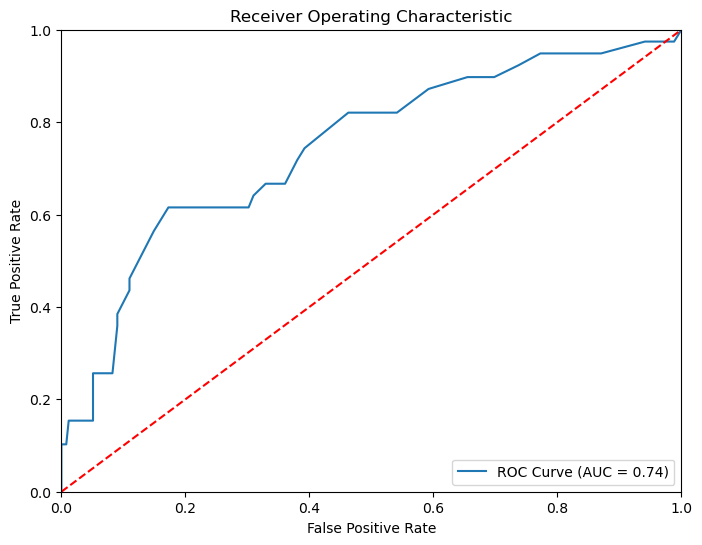

In [11]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Model Evaluation

In [12]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics

In [13]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep) 

Accuracy: 0.8775510204081632
Confusion Matrix:
[[254   1]
 [ 35   4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

